# Project: Investigate a Dataset - [Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Movie Dataset collected from The Movie Database (TMDb) contains 10,000 data points of information on movies which include movie popularity rating, budget, taglines, keywords and more. From these data poitns, we will be answering some salient questions.


### Question(s) for Analysis
What genre of movies has the highest rating, and does the rating determine the revenue generated?
Which production company has the highest budget, does the budget determine the revenue made?

In [6]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import os
% matplotlib inline


Importing the .csv file into jupyter notebook

In [7]:
filename = ('tmdb-movies.csv')

In [8]:
movies_df = pd.read_csv(filename, sep= ',')

Load datasets, first two rows

In [9]:
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Getting an insight into the details of the dataset.

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Number of rows and columns in the dataset

In [11]:
movies_df.shape

(10866, 21)

Checking for duplicate values in the dataset

In [12]:
movies_df.duplicated().sum()

1

Removing duplicated values

In [13]:
movies_df.drop_duplicates(inplace= True)

Checking duplicated values again for confirmation

In [14]:
movies_df.duplicated().sum()

0

<a id='wrangling'></a>
## Data Wrangling

> **Data Wrangling involves gathering, assessing and cleaning data. Since we have the data gathered alreday from The Movie Database (TMDB), We need to assess an clean the data.**




### Data Cleaning


The first cleaning process starts with dropping and removing columns that are not useful in the analysis and null values inside the dataset. I named the cleaned dataset.

Removing irrelevant columns from the dataset.

In [15]:
movies_df.drop(["imdb_id", "original_title", "homepage", "director", "tagline", "keywords", "overview", "budget_adj", "revenue_adj"], axis=1, inplace= True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10789 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [16]:
movies_df.shape

(10865, 12)

In [17]:
movies_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'cast', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [18]:
movies_df.head()

,id,popularity,budget,revenue,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


There is a need to check for null values and remove them 

In [19]:
movies_df.isna().sum()
movies_df.dropna(inplace= True)

Checking again for the entries dimensions 

In [20]:
movies_df.shape

(9791, 12)

> **We have succesfufly removed the null values in the dataset. From the above figure, we now have fewer rows compared to the original dataset. Although it is fewer, but we can still draw conclusions from the remaining entries because it is substantial, about 90 percet of the original entries.**

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What genre of movie has the highest rating, and does the rating determine the revenue generated?)

In [21]:
 ##This is checking one more time for content of the dataset so we know what we are working with.
movies_df.head()

,id,popularity,budget,revenue,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Genres column has multiple genres together, sperated only by ('|'), will be trying to seperate the genres to stand individually

In [22]:
genres_df = movies_df.assign(genres = movies_df['genres'].str.split("|", expand=True))
genres_df.head(10)

,id,popularity,budget,revenue,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


We need to have an idea of the genres in relation to their popularity, and revenue

In [23]:
genres_pr_df = genres_df.groupby(['genres'], as_index= False)['popularity', 'revenue'].agg('mean')
genres_pr_df.head()

,genres,popularity,revenue
0,Action,0.875259,6.519407e+07
1,Adventure,1.277373,1.328017e+08
2,Animation,0.892788,8.261093e+07
3,Comedy,0.571626,3.253189e+07
4,Crime,0.719750,3.519547e+07


Percentile of the popularity of genres

In [24]:
genres_pr_df.describe().popularity

count    20.000000
mean      0.695349
std       0.276307
min       0.208784
25%       0.559609
50%       0.705402
75%       0.848337
max       1.277373
Name: popularity, dtype: float64

Getting the top 5 most popular and highest grossing movie genre.

In [25]:
top_5 = genres_pr_df.sort_values(by= ['popularity', 'revenue'], ascending= False).head(5)
top_5.head()

,genres,popularity,revenue
1,Adventure,1.277373,1.328017e+08
15,Science Fiction,1.150894,8.652996e+07
8,Fantasy,0.911306,7.232828e+07
2,Animation,0.892788,8.261093e+07
0,Action,0.875259,6.519407e+07


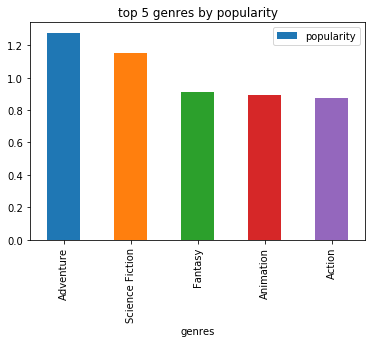

In [26]:
top_5.plot(x='genres', y='popularity', title='top 5 genres by popularity', kind='bar')

The figure above shows the top 5 genres of movies by their popularity.

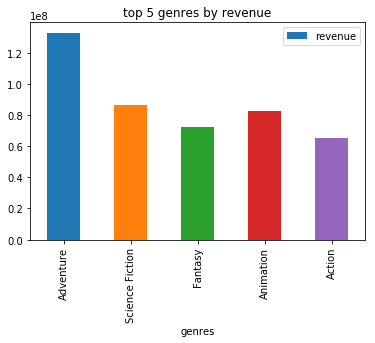

In [27]:
top_5.plot(x='genres', y='revenue', title='top 5 genres by revenue', kind='bar')

The chart above shows the top 5 genres of movies according to their revenue.

> **Relationship between the popularity of genres and the revenue generated.**

In [28]:
genres_pr_df['rating'] = pd.cut(genres_pr_df['popularity'],[0.208784, 0.559609, 0.705402, 0.848337, 1.277373], labels=['Low', 'Average', 'High', 'Very High'])
genres_pr_df['rating'].value_counts()

Very High    5
High         5
Average      5
Low          5
Name: rating, dtype: int64

In [29]:
genres_pr_df.groupby('rating').agg('mean').revenue

rating
Low          1.009803e+07
Average      2.886356e+07
High         4.913839e+07
Very High    8.789300e+07
Name: revenue, dtype: float64

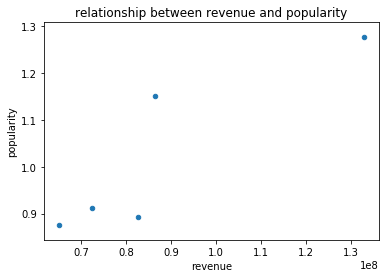

In [30]:
top_5.plot(x='revenue', y='popularity', title='relationship between revenue and popularity', kind='scatter')

The scatter plot above shows the correlation between revenue and popularity of each genres of movies.

### Research Question 2 (Which production company has the highest budget, does the budget determine the revenue made?)

In [31]:
movies_df.head()

,id,popularity,budget,revenue,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Splitting the production companies

In [33]:
prod_df = movies_df.assign(production_companies = movies_df['production_companies'].str.split("|", expand=True))
prod_df.head()

,id,popularity,budget,revenue,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures,4/1/15,2947,7.3,2015


Sorting production companies based on budget spent, and revenues made.

In [34]:
prod_bd_df = prod_df.groupby(['production_companies'], as_index= False)['budget', 'revenue'].agg('mean')
prod_bd_df.head()

,production_companies,budget,revenue
0,10th Hole Productions,2.250000e+06,6.191000e+04
1,120dB Films,2.833334e+06,4.593333e+02
2,1492 Pictures,1.112500e+08,7.043868e+08
3,1818,5.000000e+06,1.223263e+07
4,185 Trax,4.200000e+06,0.000000e+00


Getting the top 5 companies by their budgets, revenue.

In [35]:
top_5 = prod_bd_df.sort_values(by= ['budget', 'revenue'], ascending= False).head(5)
top_5.head()

,production_companies,budget,revenue
407,Boram Entertainment Inc.,425000000.0,11087569.0
1803,Mid Atlantic Films,175000000.0,150962475.0
2728,"Todman, Simon, LeMasters Productions",170000000.0,222104681.0
675,Cool Music,150000000.0,938212738.0
2083,Patalex IV Productions Limited,150000000.0,895921036.0


This plot shows the top 5 production companies by their budgets

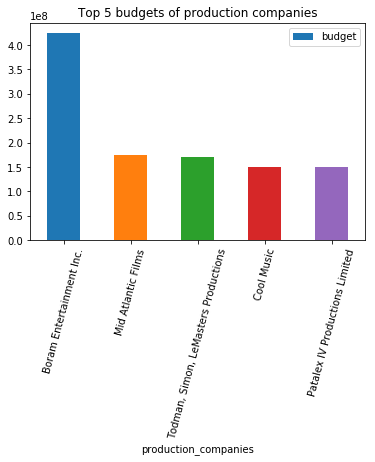

In [36]:
top_5.plot(x='production_companies', y='budget', title='Top 5 budgets of production companies', rot= 75, kind='bar')

The chart below shows the same top 5 companies by the revenues made

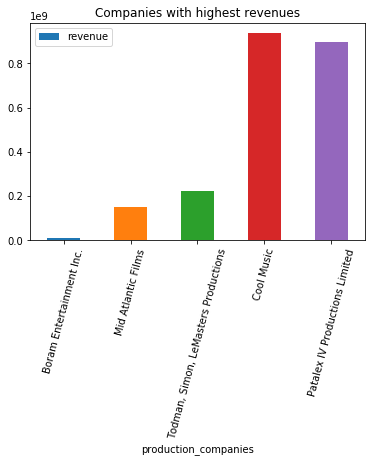

In [37]:
top_5.plot(x='production_companies', y='revenue', title='Companies with highest revenues', rot= 75, kind='bar')

Scatter diagram below shows the relationship between budget spent and revenue made by the production companies

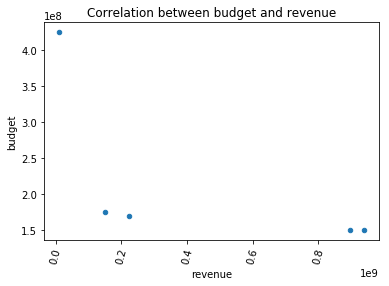

In [38]:
top_5.plot(x='revenue', y='budget', title='Correlation between budget and revenue', rot= 75, kind='scatter')

From the diagrams above it can be concluded that companies that spent minimal budgets, have higher retruns in terms of revenue generated

<a id='conclusions'></a>
## Conclusions

A quick glance at the tables above, we can draw the conclusion that Adventure movies has the highest popularity. Figures above also shows that the higher the rating of a movie genre, the higher the revenue it generates. Although correlation is not causation, which means a change in one variable does not imply a change in the other variable.

Production companies spent high budgets, but that did not turn out to be a great investment, as companies that spent minimally on movie production had better revenues.

So we can conclude that although having a good budget to work with is nice, but it is not the only factor contributing to the success of a movie, other factors like popularity, and genre of movie produced should always be considered too.



> **Limitations**

We had some of our null values removed, and that accounted for about 10 percent of the total dataset. Although minimal, but we can say it might have affected our result in one way or another.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0